<a href="https://colab.research.google.com/github/RahafSobh/RahafSobh/blob/main/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment, I applied Sobel edge detection on five grayscale bird images.
The images were loaded as NumPy arrays, and convolution was implemented manually using loops.
I used Sobel filters in the x and y directions and calculated the gradient magnitude using:

(Gx^2+Gy^2)^1/2


The resulting feature maps were then displayed.

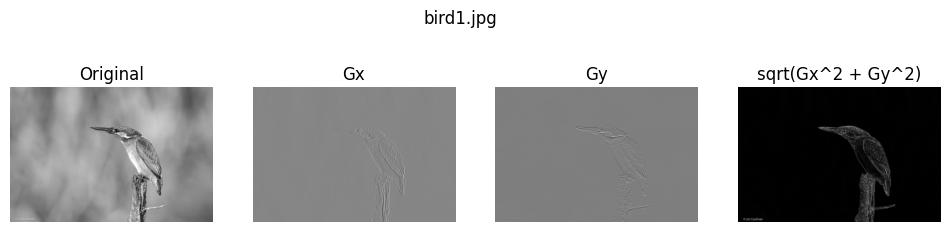

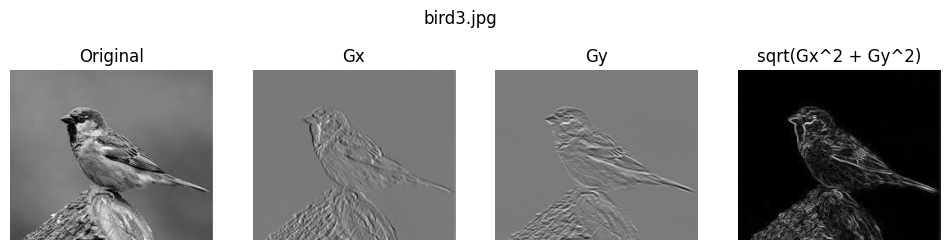

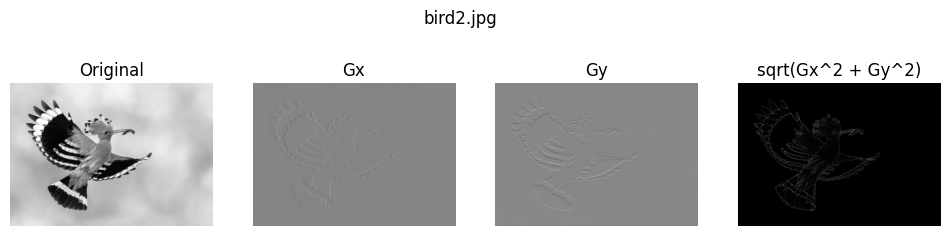

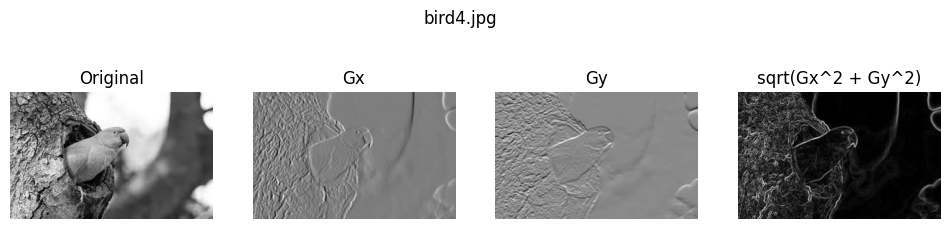

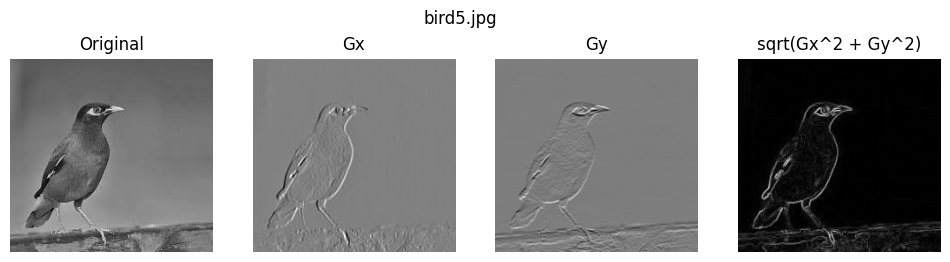

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os

def load_images(folder_path, max_images=5):
    images = []
    names = []

    files = os.listdir(folder_path)
    files = [f for f in files if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
    files = files[:max_images]

    for file in files:
        img_path = os.path.join(folder_path, file)
        img = Image.open(img_path).convert('L')
        img_np = np.array(img, dtype=np.float32)
        images.append(img_np)
        names.append(file)

    return images, names


def conv2d(image, kernel):
    k_h, k_w = kernel.shape
    pad_h = k_h // 2
    pad_w = k_w // 2


    padded_image = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')
    result = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            area = padded_image[i:i+k_h, j:j+k_w]
            result[i, j] = np.sum(area * kernel)

    return result


Gx = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)

Gy = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)


folder_path = "birds"   # folder with 5 grayscale bird images
images, image_names = load_images(folder_path)

for img, name in zip(images, image_names):

    gx_map = conv2d(img, Gx)
    gy_map = conv2d(img, Gy)

    # gradient magnitude
    magnitude = np.sqrt(gx_map**2 + gy_map**2)

    # show results
    plt.figure(figsize=(12, 3))
    plt.suptitle(name)

    plt.subplot(1, 4, 1)
    plt.title("Original")
    plt.imshow(img, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title("Gx")
    plt.imshow(gx_map, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title("Gy")
    plt.imshow(gy_map, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title("sqrt(Gx^2 + Gy^2)")
    plt.imshow(magnitude, cmap='gray')
    plt.axis('off')

    plt.show()
